In [2]:
import os
import sys
import urllib, io
os.getcwd()
sys.path.append("..")
sys.path.append("../utils")
proj_dir = os.path.abspath('../..')

import numpy as np
import scipy.stats as stats
import pandas as pd

from scipy.spatial import distance
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from collections import Counter
import json
import re
import ast

import importlib

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import pickle
import nltk

import drawing_utils as drawing

import block_construction_helpers as bc

/Users/will/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
experiment_name = 'perceptual_chunks'

## directory & file hierarchy
proj_dir = os.path.abspath('..')
datavol_dir = os.path.join(proj_dir,'data')
analysis_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
results_dir = os.path.join(proj_dir,'results')

# paths specific to this experiment
experiment_results_dir = os.path.join(results_dir, experiment_name)
plot_dir = os.path.join(experiment_results_dir,'plots')
csv_dir = os.path.join(experiment_results_dir,'csv')
json_dir = os.path.join(experiment_results_dir,'json')

# paths to silhouette data
silhouette_results_dir = os.path.join(results_dir, 'silhouette')
silhouette_csv_dir = os.path.join(silhouette_results_dir,'csv')

png_dir = os.path.abspath(os.path.join(datavol_dir,'png'))
jefan_dir = os.path.join(analysis_dir,'jefan')
will_dir = os.path.join(analysis_dir,'will')

## add helpers to python path
if os.path.join(proj_dir,'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'stimuli'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       

In [4]:
# latest iteration name to include
iteration_name = 'pilot_0c'
iteration_names = ['pilot_0','pilot_0b','pilot_0c']

# variables to check integrity of data
numTrials = 8

In [5]:
# load csvs outputted from data generator

# trial_path = os.path.join(csv_dir,'perceptual_chunks_trial_{}.csv'.format(iteration_name))
# df_trial = pd.read_csv(trial_path)

# color_path = os.path.join(csv_dir,'perceptual_chunks_color_{}.csv'.format(iteration_name))
# df_color = pd.read_csv(trial_path)

In [6]:
# open pickled dataframes

trial_path_p = os.path.join(csv_dir,'perceptual_chunks_trial_{}.p'.format(iteration_name))
df_trial = pickle.load( open(trial_path_p, "rb" ))

color_path_p = os.path.join(csv_dir,'perceptual_chunks_color_{}.p'.format(iteration_name))
df_color = pickle.load( open(color_path_p, "rb" ))

In [7]:
# useful vars
ppts = np.sort(df_trial.gameID.unique())
targets = np.sort(df_trial.targetName.unique())
n_ppt = len(ppts)
print(str(n_ppt) + ' ppts loaded')

50 ppts loaded


## Visualizations

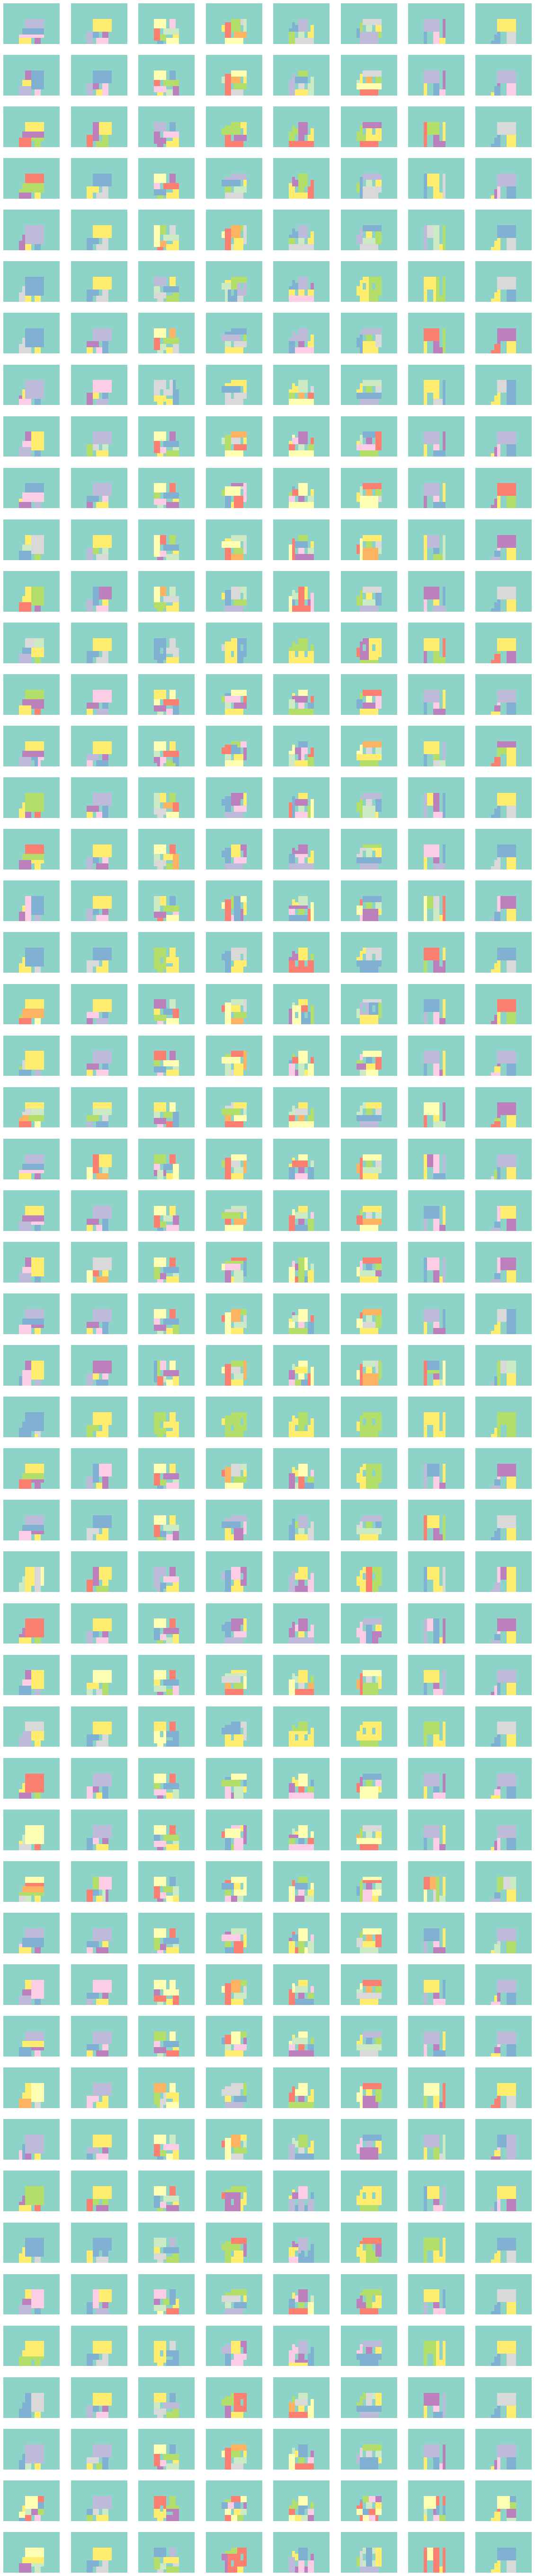

In [7]:
# visualize all participant's chunks

fig, axs = plt.subplots(n_ppt, numTrials, figsize=(20,2*n_ppt))

for i, ppt in enumerate(ppts):

    for j, target in enumerate(targets):

        chunks = df_trial[(df_trial.gameID==ppt) & (df_trial.targetName==target)]['gameGrid'].iloc[0]
        chunks = np.rot90(chunks)
        axs[i,j].axis('off')
        axs[i,j].imshow(chunks, cmap='Set3')

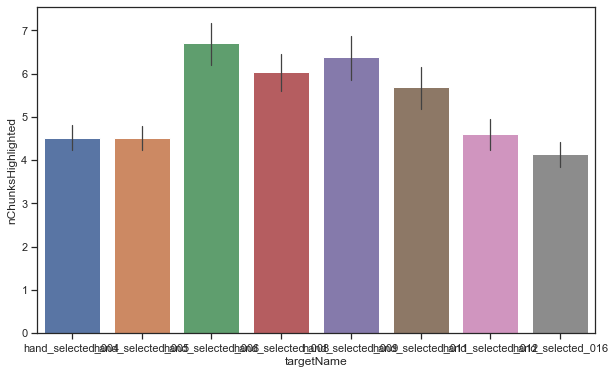

In [8]:
# how many chunks do people identify in each structure?

fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.barplot(data=df_trial, y='nChunksHighlighted',x='targetName', order=targets)

## Perceptual chunk analysis notes


### Properties of the chunk painting process
- size of chunk colored in over time
    - distinguish adding to the same chunk from creating new ones
- average position of colored square over trial
    - is it bottom to top?

### Simple properties of perceptual chunks as predictors of difficulty/ complexity
- Number of perceptual chunks in each structure, as a measure of (perceptual) complexity
- Proportion of perceptual chunks that can't be made with blocks provided (as a measure of difficulty)
- Variance in perceptual chunks as a measure of 'knowing what to do first' when building (e.g. thinking time pre first block)
    - calculate using edit distance below

### Strategies for comparing perceptual chunks with procedural chunks

Within *perceptual* chunks:
- Find an edit distance
    - cost: +1 for changing a square, 0 for changing color of all members of a group to a unique color
- Find a unique 'median' perceptual decomposition
    - minimum edit distance to all decompositions

Currently, our *procedural* chunk measures don't give us a full decomposition.
Bag of chunks:
- Proportion of perceptual chunks that are also procedural chunks
    - i.e. get the overlap in distributions
    - Would need to think about chunk sizes, as well as popularity: don't want to be systematically skimming-off the procedural chunks that could match.
    - As a measure of difficulty?
- Find the most popular procedural chunks in all reconstructions
    - Are these more likely to be within, or crossing, a perceptual chunk? Compare to some baseline.
    - Do procedural chunks become less tied to the perceptual ones with practice? 

Alternatively, we could find a way to obtain decompositions from procedural chunks.


#### Once we have a metric:
- Pre vs. in post: do people start off with perceptual chunks but move on to procedural ones?


### Future analyses and experiments 
- Do *perceptual parses* change with building experience?
- How consistent are perceptual parses for an individual?
    - Do they become more consistent with building practice?
    




## Properties of chunk painting process

The main purpose of this experiment was to obtain perceptual decompositions. The process of recording them is less relevant to our goals, however we include some basic analyses.

#### Notes about experiment:
- To add a chunk people could either click once to change the color on one square (colorType='click') or drag color from a square (colorType='drag'). If they dragged from an empty square, the color would auto-increment to a new color. Clicks on individual squares cycle through colors, so we expect many more clicks than drags.
- People may also overwrite previously colored squares. Therefore the recording of one particular chunk may span several color events, and may also be distributed among other coloring events unrelated to that chunk.

- For each coloring event, we record the squares changed, the new color group (1-8), the number of chunks currently highlighted (number of colors on shape not including the default grey), and timing data.




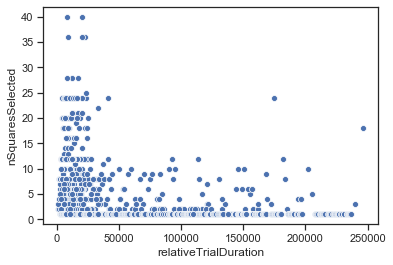

In [10]:
# how many grid-squares are selected in each action?
# In general, people are selecting the biggest regions first

sns.scatterplot(data=df_color, x='relativeTrialDuration', y='nSquaresSelected')

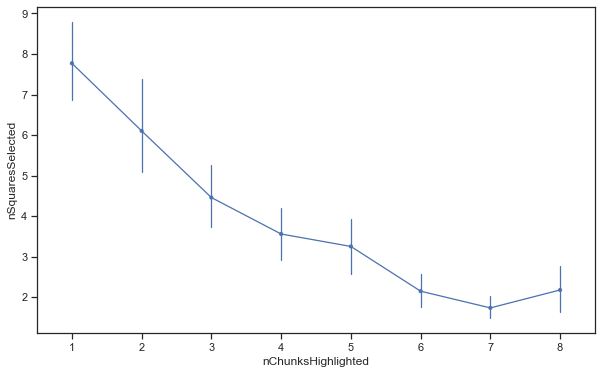

In [11]:
# do people highlight the largest chunks first?
# although- nChunksHighlighted isn't the same as finishing a chunk. 
# this will be biased: nChunks highlighted stays the same if you just extend a chunk by a little bit, but only one square is selected at that point
#

fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.pointplot(data=df_color, x='nChunksHighlighted', y='nSquaresSelected')

## Perceptual chunks as predictors of difficulty/ complexity

### Number of perceptual chunks in each structure

This is a potential measure of structure difficulty, particularly for early trials where we expect perceptual decompositions to more strongly structure participant's plans.
I'd predict that structures with a greater number of perceptual chunks require more extensive planning.

<Figure size 720x432 with 0 Axes>

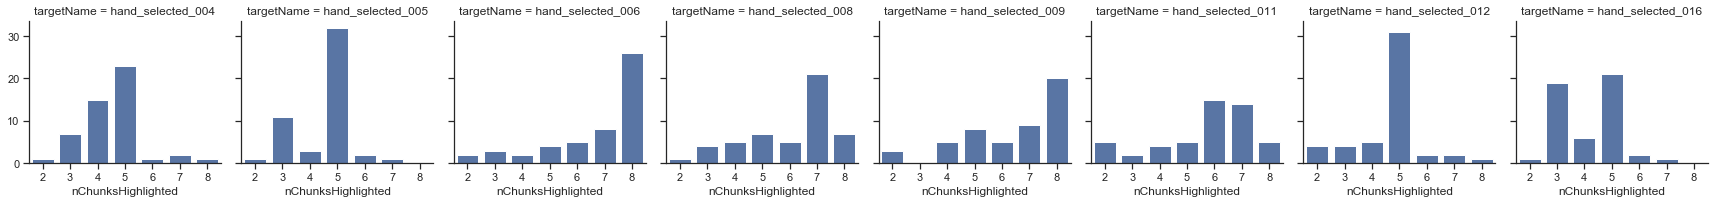

In [14]:
fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
g = sns.FacetGrid(df_trial, col="targetName", col_order=targets)
g.map(sns.countplot, "nChunksHighlighted", order=range(2,9));

## Comparing perceptual chunks with building procedures

### Cluster chunks to identify a set of chunks for each tower

In [554]:
def chunks_from_KMeans(chunks,
                       k_values = [10, 20],
                       thresholds = [0.4]):

    kms = {}

    df_kms = pd.DataFrame()

    for target in targets:

        kms[target] = {}

        for n_cluster in k_values:

            feature_mat = np.array(chunks[target])

            # get the mean number of chunks for that structure
            meanNChunks = np.round(df_trial.groupby('targetName')['nChunksHighlighted'].mean()).astype(int).to_dict()

            # group into n clusters where n is the mean amount of chunks for that structure
            # kmeans = KMeans(n_clusters=meanNChunks[target], random_state=0).fit(feature_mat)
            kms[target][n_cluster] = KMeans(n_clusters=n_cluster, random_state=0).fit(feature_mat)

            for threshold in thresholds:

                df_kms = df_kms.append(
                    {
                        'cluster_method': 'k-means',
                        'cluster_object': kms[target][n_cluster],
                        'targetName': target,
                        'n_cluster': n_cluster,
                        'cluster_centers': kms[target][n_cluster].cluster_centers_,
                        'chunks': (kms[target][n_cluster].cluster_centers_>=threshold)*1,
                        'threshold': threshold,
                        'inertia': kms[target][n_cluster].inertia_,

                    },
                    ignore_index=True
                )
                
                
    return df_kms, kms


def max_values(cc):
    return np.array([cc[i] == np.max(cc,axis=1)[i] for i in range(0, cc.shape[0])])*1
    
def quantile_values(cc, quantile = 0.5):    
    b = cc
    b[b==0] = np.nan
    #take values greater than 0, find a quantile
    return np.array([b[i] >= np.nanquantile(b, quantile, axis=1)[i] for i in range(0, b.shape[0])])*1

# def chunks_from_KMeans_method(chunks,
#                               k_values = [10, 20],
#                               method = 'max',
#                               quantile = 0.5):

#     kms = {}

#     df_kms = pd.DataFrame()

#     for target in targets:

#         kms[target] = {}

#         for n_cluster in k_values:

#             feature_mat = np.array(chunks[target])

#             # get the mean number of chunks for that structure
#             meanNChunks = np.round(df_trial.groupby('targetName')['nChunksHighlighted'].mean()).astype(int).to_dict()

#             # group into n clusters where n is the mean amount of chunks for that structure
#             # kmeans = KMeans(n_clusters=meanNChunks[target], random_state=0).fit(feature_mat)
#             kms[target][n_cluster] = KMeans(n_clusters=n_cluster, random_state=0).fit(feature_mat)
            
#             if method == 'max':
#                 rounded_chunks = max_values(kms[target][n_cluster].cluster_centers_)
#                 quantile = ''
#             elif method == 'quantile':
#                 rounded_chunks = quantile_values(kms[target][n_cluster].cluster_centers_, quantile=quantile)

#             print(rounded_chunks)
            
#             df_kms = df_kms.append(
#                 {
#                     'cluster_method': 'k-means',
#                     'cluster_object': kms[target][n_cluster],
#                     'targetName': target,
#                     'n_cluster': n_cluster,
#                     'cluster_centers': kms[target][n_cluster].cluster_centers_,
#                     'chunks': rounded_chunks,
#                     'threshold': method + str(quantile),
#                     'inertia': kms[target][n_cluster].inertia_,

#                 },
#                 ignore_index=True
#             )

                
#     return df_kms, kms
            


def chunks_from_affinity_prop(feature_mats, damping_values = [0.74]):

    clusters = {}
    df_AP = pd.DataFrame()

    for target in targets:
        
        clusters[target] = {}

        for d in damping_values:

            clusters[target][d] = AffinityPropagation(damping=d).fit(feature_mats[target])
            
            df_AP = df_AP.append(
                    {
                        'cluster_method': 'affinity_propagation',
                        'cluster_object':  clusters[target][d],
                        'targetName': target,
                        'n_cluster': len(clusters[target][d].cluster_centers_indices_),
                        'chunks': clusters[target][d].cluster_centers_,
                        'damping': d,

                    },
                    ignore_index=True
                )
            
            
    return df_AP



        #     sorted_chunks = feature_mat[np.argsort(kmeans.labels_),:]

In [577]:
def find_world_diffs(df_proc_world_states):

    # find all chunks for all structures (so we can search for the structures that involve this chunk)

    # a 'window-size' is the amount of states between first and final one considered INCLUSIVE. i.e. n is n-1 actions.
    # i.e. window size 3 means 2 consecutive actions
    window_sizes = range(2,10) 

    df_target_grouped = df_proc_world_states.groupby(['gameID','targetName','phase_extended'])['flatDiscreteWorldStr']

    df_world_deltas = df_proc_trial.copy()

    for chunk_size in window_sizes:

        # for each reconstruction, get a list of ngrams of that length
        df_ngrams = df_target_grouped.agg(lambda ws: list(nltk.ngrams(list(ws), chunk_size))).reset_index()

        # find the chunks (world deltas) from those ngrams   
        df_ngrams['world_diff'] = df_ngrams['flatDiscreteWorldStr'].apply(lambda ngrams:
                                         ["".join([str(int(a)) for a in 
                                          list(
                                              np.logical_xor(np.array(list(ngram[-1])).astype(np.bool), 
                                              np.array(list(ngram[0])).astype(np.bool))
                                              )])
                                         for ngram in ngrams])

        df_ngrams = df_ngrams.rename(columns={"flatDiscreteWorldStr": str(chunk_size)+'_grams',
                                              "world_diff": str(chunk_size)+'_chunks'})

        df_world_deltas = df_world_deltas.merge(df_ngrams, how='left', on=['gameID','targetName','phase_extended'])

    # combine chunks from all window sized into list, so we can search for chunks in the entire reconstruction
    df_world_deltas['all_chunks'] = df_world_deltas[[(str(chunk_window)+'_chunks') \
                        for chunk_window in window_sizes if (str(chunk_window)+'_chunks') in df_world_deltas.columns]]\
    .apply(lambda row: [chunk for chunks in list(row) for chunk in chunks], axis=1)


    return df_world_deltas

In [562]:
def find_perc_chunks_in_procedures(df_cluster_rows, 
                                   df_proc_chunks,
                                   min_cluster_members = 0):
# for each exemplar with more than 3 members, count proportion of reconstructions in first, and number of reconstructions in final attempt

    cluster_counts = pd.DataFrame()

    for target in targets:

    #     row = df_cluster_rows[(df_cluster_rows.targetName == target) & 
    #                             (df_cluster_rows.cluster_method=='affinity_propagation') & 
    #                             (df_cluster_rows.damping==0.74)].reset_index()

        row = df_cluster_rows[(df_cluster_rows.targetName == target)].reset_index()


        labels = row.cluster_object[0].labels_

        for cluster_number, exemplar in enumerate(row.chunks[0]):

            chunk_array = exemplar.reshape((8,8))

            chunk_str = bc.cropped_chunk_to_string(chunk_array)

            n_cluster_members = sum(labels == cluster_number)

            if n_cluster_members >= min_cluster_members:

                props = {}

                for phase in ['pre','post']:

                    subset_for_target = df_proc_chunks[#(df_proc_chunks.blockFell == False) &
                                                       (df_proc_chunks.targetName == target) &
                                                       (df_proc_chunks.phase == phase)]

                    subset_with_chunk = subset_for_target[(subset_for_target['all_chunks']\
                                                           .apply(lambda chunks: chunk_str in chunks))]

                    row = {
                        'targetName': target,
                        'phase': phase,
                        'chunk_str': chunk_str,
                        'chunk_array': chunk_array,
                        'n_cluster_members': n_cluster_members,
        #                 'reconstructions_with_chunk': list(subset_with_chunk['discreteWorld']),
                        'total_phase_reconstructions': subset_for_target.shape[0],
                        'n_with_chunk': subset_with_chunk.shape[0],
                        'chunk_id': cluster_number,
                        'chunk_height': np.sum(np.dot(np.sum(chunk_array, axis=0),np.arange(8)))/np.sum(chunk_array) + 0.5,
                        'proportion_with_chunk': subset_with_chunk.shape[0] / subset_for_target.shape[0]

                    }

                    props[phase] = subset_with_chunk.shape[0] /subset_for_target.shape[0]

                    cluster_counts = cluster_counts.append(row,ignore_index=True)

                cluster_counts.loc[(cluster_counts.targetName == target) & (cluster_counts.chunk_str == chunk_str), 'difference'] = props['post'] - props['pre']

                cluster_counts.loc[(cluster_counts.targetName == target) & (cluster_counts.chunk_str == chunk_str), 'both_zero'] = \
                    (props['pre'] == 0) & (props['post'] == 0)
                
    return cluster_counts


## Precompute clustering

#### Create dictionaries of chunks (for k-means), and distance matrices between chunks (for affinity propagation)

In [557]:
def addPerceptualChunks(chunk_list, decomposition, group_number):
    '''
    Checks whether a chunk with that group number exists in the decomposition and adds it to chunk_list 
    '''
    chunk = (decomposition==group_number)*1
    if chunk.any():
        chunk_list.append(chunk)

In [558]:
# for each structure, throw all chunks from all decompositions into a giant list

perceptual_chunks = {}

for target in targets:
    
    perceptual_chunks[target] = []
    
    for group in range(1,9):
        df_trial[df_trial.targetName==target].structureGrid.apply(\
            lambda decomposition: addPerceptualChunks(perceptual_chunks[target],
                                                                        decomposition,
                                                                        group))

In [559]:
# create distance matrices between chunks within each structure

dmats = {}
chunks = {}

for target in targets:
    
    chunks[target] = [chunk.flatten() for chunk in perceptual_chunks[target]] 
    
    dmats[target] = np.zeros((len(chunks[target]), len(chunks[target])))
    
    for i, chunk_i in enumerate(chunks[target]):
        for j, chunk_j in enumerate(chunks[target]):
            dmats[target][i,j] = distance.euclidean(chunk_i, chunk_j)

In [560]:
# create feature matrices for affinity propagation (nsamples, nfeatures)

feature_mats = {}

for target in targets:
    
    flat_chunks = [chunk.flatten() for chunk in perceptual_chunks[target]]
    feature_mats[target] = np.array(flat_chunks)

In [561]:
# Do clustering

# affinity propagation: provides us with exemplar, and allows us to filter out clusters with few members.
# WARNING: sensitive to damping value!
df_ap = chunks_from_affinity_prop(feature_mats, damping_values = [0.74])

# k-means: needs prespecified k
df_kms, _ = chunks_from_KMeans(chunks, thresholds=[0.1,0.2,0.4,0.6,0.8])

df_chunk_clusters = df_ap.append(df_kms).reset_index()

In [521]:
# df_kms_max, kms = chunks_from_KMeans_method(chunks, method='quantile', quantile=0.9)
# df_chunk_clusters = df_chunk_clusters.append(df_kms_max).reset_index()
# df_chunk_clusters = df_chunk_clusters.drop(['level_0','index'],axis=1)

#### Load in building procedures from block_silhouette, and find all world-deltas for all reconstructions

'world-deltas': change in world state (i.e. squares covered by blocks) between action i and action j, for all i and j.

In [15]:
# load in procedural data from silhouette experiment
silhouette_world_path = os.path.join(silhouette_csv_dir,'procedural_chunks_world_states_{}.p'.format('Exp2Pilot3_all'))
df_proc_world_states = pickle.load( open(silhouette_world_path, "rb" ))


silhouette_trial_path = os.path.join(silhouette_csv_dir,'block_silhouette_{}_good.csv'.format('Exp2Pilot3_all'))
df_proc_trial = pd.read_csv(silhouette_trial_path)

In [563]:
# find the world-deltas in building procedures
df_world_deltas = find_world_diffs(df_proc_world_states)

In [574]:
# count occurrences of each chunk by looking at world deltas
cluster_counts = find_perc_chunks_in_procedures(df_chunk_clusters[ 
                                                (df_chunk_clusters.cluster_method=='k-means') & 
                                                (df_chunk_clusters.threshold == 0.4) &
                                                (df_chunk_clusters.n_cluster == 20)], 
                                                df_world_deltas,
                                                min_cluster_members = 0)

/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in long_scalars


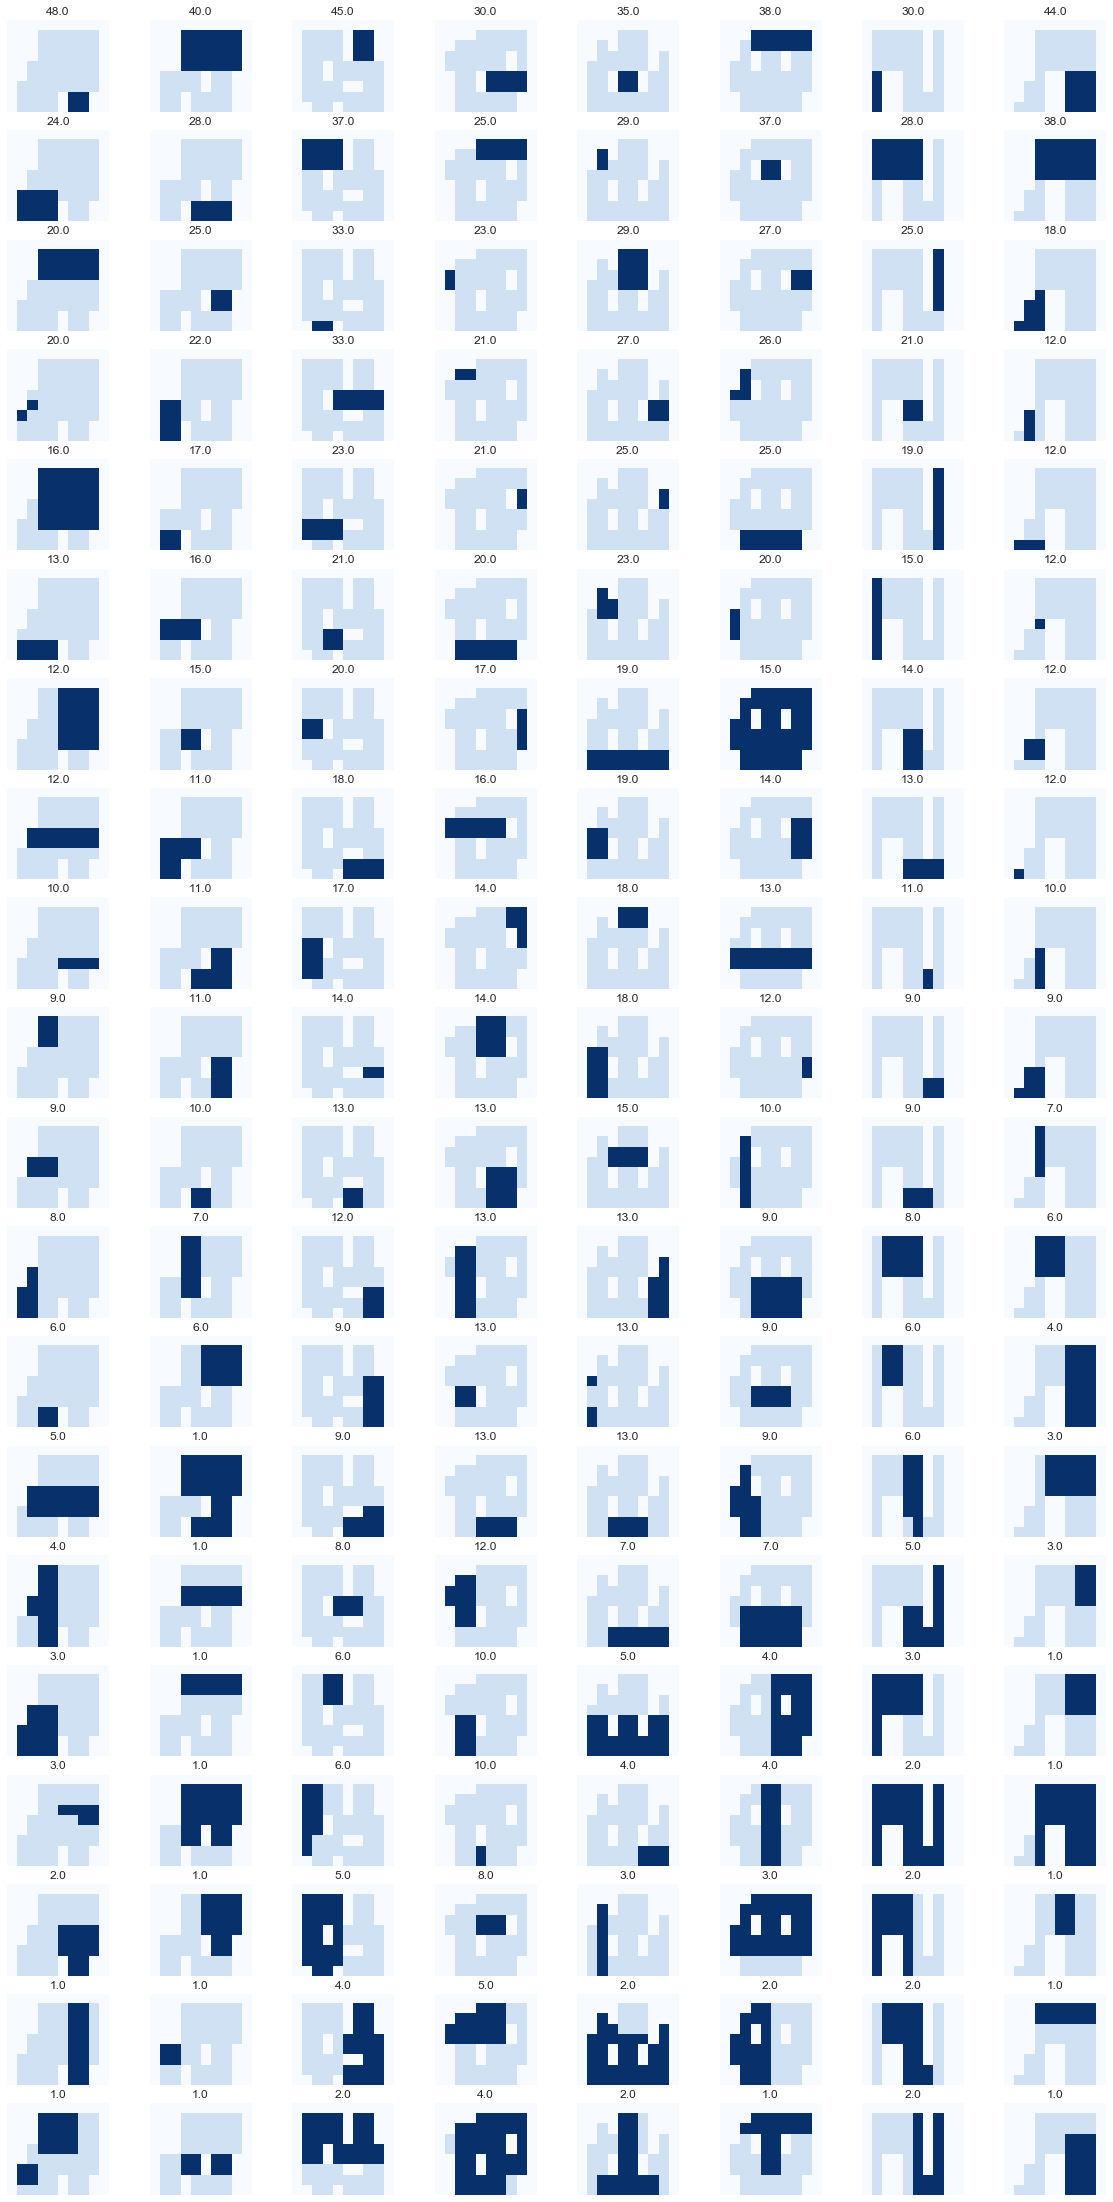

In [575]:
n_chunks = 20

fig, axs = plt.subplots(n_chunks, len(targets), figsize=(20,2*n_chunks))

for i, target in enumerate(targets):
    for j in range(0, n_chunks):    
        greatest_increase = cluster_counts[(cluster_counts.phase=='post') &
                                           (cluster_counts.targetName==target)].sort_values('n_cluster_members', ascending=False).reset_index()
        axs[j,i].axis('off')
        axs[j,i].set_title(str(round(greatest_increase.loc[j,'n_cluster_members'], 2)))
        drawing.show_chunk([greatest_increase.loc[j,'chunk_str']], axs[j,i], target=target, cmap='Blues', cropped=True)

In [537]:
# x = df_chunk_clusters.loc[(df_chunk_clusters.targetName==targets[5]) &
#                   (df_chunk_clusters.threshold==0.4) & 
#                   (df_chunk_clusters.n_cluster==20),'cluster_object'].reset_index().loc[0,'cluster_object']

In [569]:
cluster_counts[(cluster_counts.phase=='post') & (cluster_counts.both_zero)].groupby('targetName').count()

,chunk_array,chunk_height,chunk_id,chunk_str,n_cluster_members,n_with_chunk,phase,proportion_with_chunk,total_phase_reconstructions,difference,both_zero
targetName,,,,,,,,,,,
hand_selected_004,17,17,17,17,17,17,17,17,17,17,17
hand_selected_005,11,11,11,11,11,11,11,11,11,11,11
hand_selected_006,12,12,12,12,12,12,12,12,12,12,12
hand_selected_008,12,12,12,12,12,12,12,12,12,12,12
hand_selected_009,14,14,14,14,14,14,14,14,14,14,14
hand_selected_011,14,14,14,14,14,14,14,14,14,14,14
hand_selected_012,14,14,14,14,14,14,14,14,14,14,14
hand_selected_016,17,17,17,17,17,17,17,17,17,17,17


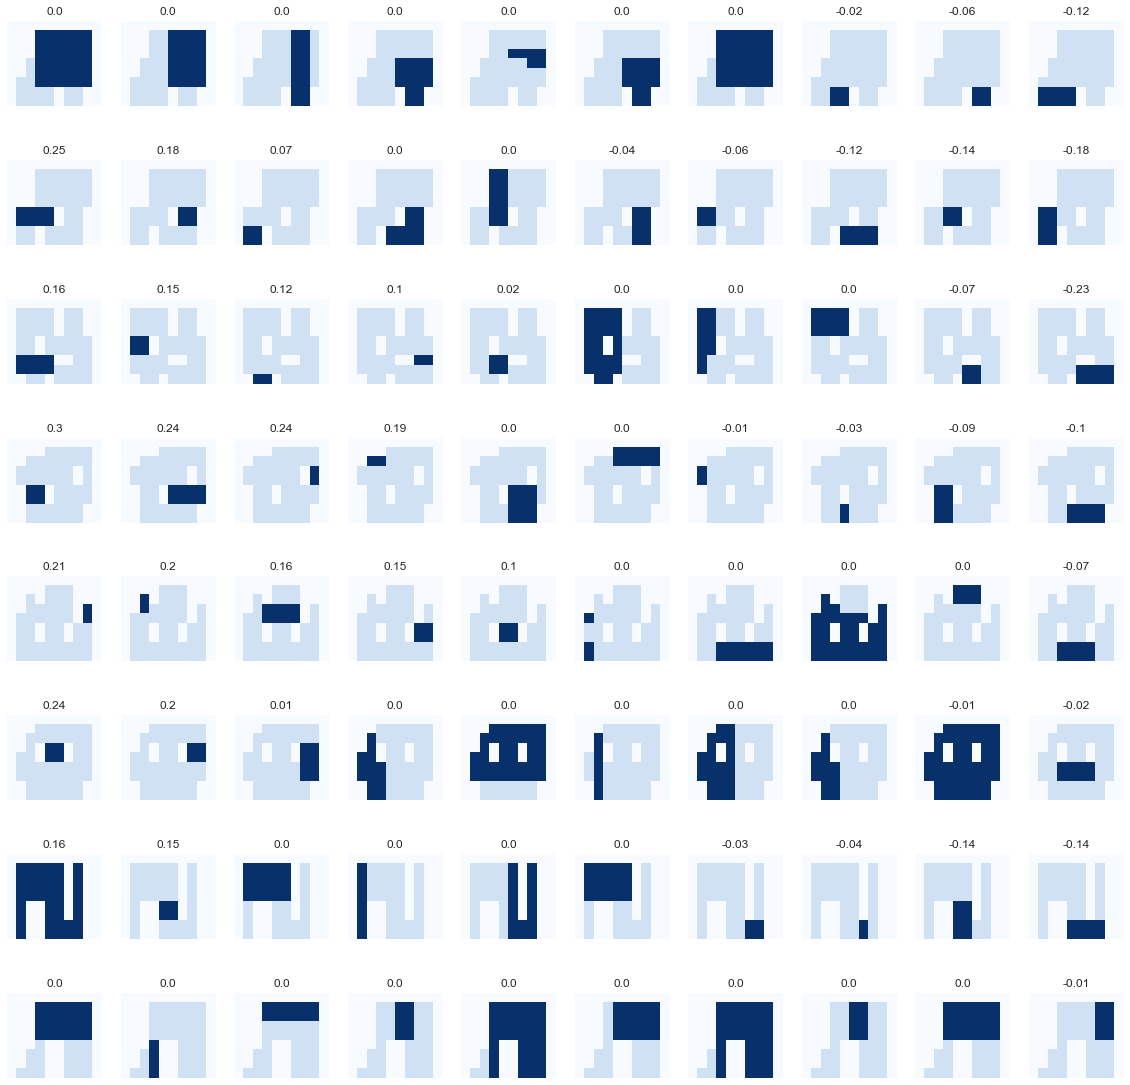

In [576]:
#something going wrong here

n_chunks = 5

fig, axs = plt.subplots(len(targets), n_chunks*2, figsize=(4*n_chunks,2.5*len(targets)))

for i, target in enumerate(targets):
    for j in range(0, n_chunks):    
        greatest_increase = cluster_counts[(cluster_counts.phase=='post') &
                                           (cluster_counts.targetName==target)].sort_values('difference', ascending=False).reset_index()
        # do something graphically with: greatest_increase.loc[j,'diff']
        axs[i,j].axis('off')
        axs[i,j].set_title(str(round(greatest_increase.loc[j,'difference'], 2)))
        drawing.show_chunk([greatest_increase.loc[j,'chunk_str']], axs[i,j], target=target, cmap='Blues', cropped=True)

for i, target in enumerate(targets):
    for j in range(0, n_chunks):    
        greatest_increase = cluster_counts[(cluster_counts.phase=='post') &
                                           (cluster_counts.targetName==target)].sort_values('difference', ascending=True).reset_index()
        # do something graphically with: greatest_increase.loc[j,'diff']
        axs[i,n_chunks*2-1-j].axis('off')
        axs[i,n_chunks*2-1-j].set_title(str(round(greatest_increase.loc[j,'difference'], 2)))
        drawing.show_chunk([greatest_increase.loc[j,'chunk_str']], axs[i,n_chunks*2-1-j], target=target, cmap='Blues', cropped=True)

# <-- Largest increase first to final ... Largest decrease first to final-->

In [103]:
# filter out totally missing chunks

cluster_counts_full = cluster_counts
cluster_counts = cluster_counts[cluster_counts.both_zero==False]

In [104]:
proportion_chunks_not_built_at_all = cluster_counts[cluster_counts.phase=='pre'].shape[0] / cluster_counts_full[cluster_counts_full.phase=='pre'].shape[0]

print(str(proportion_chunks_not_built_at_all*100) + '% of perceptual chunks built in one of first and final reps')

71.25% of perceptual chunks built in one of first and final reps


In [105]:
n_chunks_total = cluster_counts_full[(cluster_counts_full.phase=='pre')].shape[0]
assert cluster_counts_full[(cluster_counts_full.phase=='pre')].shape[0] == cluster_counts_full[(cluster_counts_full.phase=='post')].shape[0]

n_chunks_built_pre = cluster_counts_full[(cluster_counts_full.phase=='pre') & (cluster_counts_full.n_with_chunk==0)].shape[0]
n_chunks_built_post = cluster_counts_full[(cluster_counts_full.phase=='post') & (cluster_counts_full.n_with_chunk==0)].shape[0]

print(str(100*n_chunks_built_pre/n_chunks_total) + '% of perceptual chunks not built in pre')
print(str(100*n_chunks_built_post/n_chunks_total) + '% of perceptual chunks not built in post')

33.75% of perceptual chunks not built in pre
31.875% of perceptual chunks not built in post


### How often are the shapes identified in the perceptual experiment built in a sequence of consecutive block-placements?

Clustering has given us a set of 'perceptual chunks'. We now look at building procedures to see how often reconstructions contained each chunk. If consecutive actions yield a world-delta that is the same shape as a perceptual chunk, we say that that chunk was built.

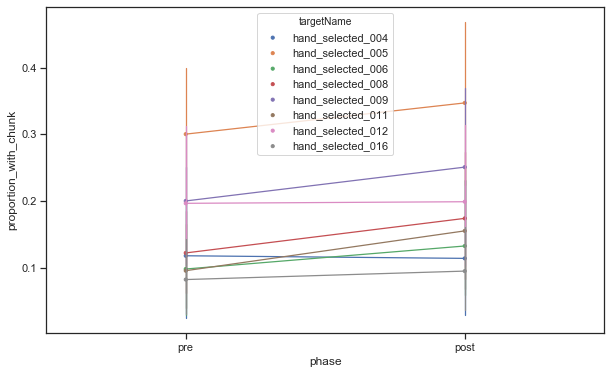

In [169]:
# Were perceptual chunks built more in the first or final repetition? By structure

fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.pointplot(data=cluster_counts, x='phase', y='proportion_with_chunk', hue='targetName')

<Figure size 1008x720 with 0 Axes>

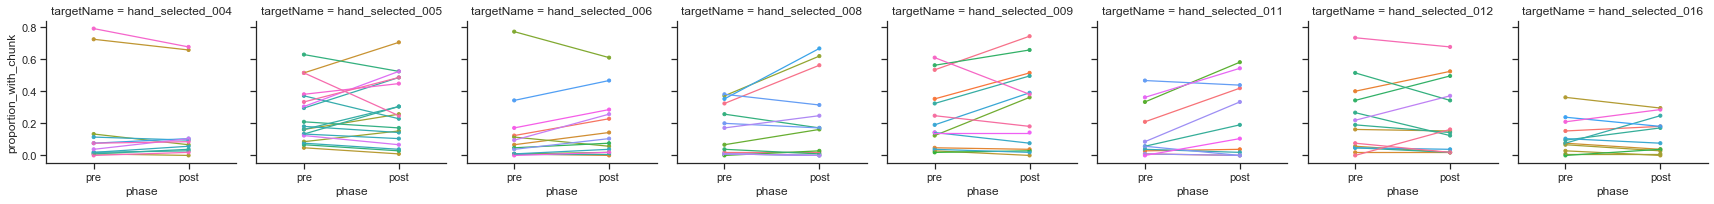

In [87]:
# How many chunks were build more, and how many were built less?

fig = plt.figure(figsize=(14,10))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
g = sns.FacetGrid(data=cluster_counts, col="targetName", hue="chunk_str", col_order=targets)
g.map(sns.pointplot,"phase","proportion_with_chunk", order=['pre','post'])

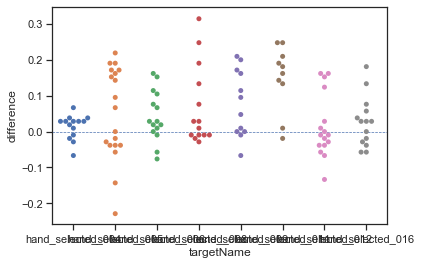

In [118]:
p = sns.swarmplot(y='difference', x='targetName', data=cluster_counts[cluster_counts.phase=='post'], dodge=True)
ax = p.axes
ax.axhline(0, ls='--')

<Figure size 1008x720 with 0 Axes>

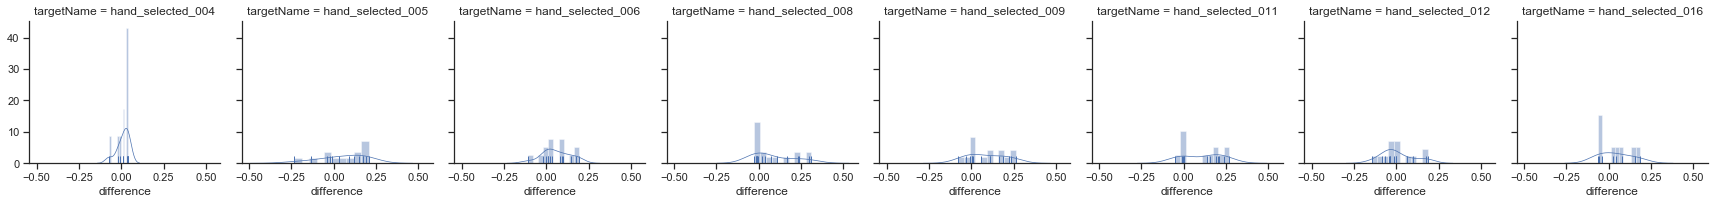

In [25]:
# How many chunks were build more, and how many were built less?

fig = plt.figure(figsize=(14,10))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
# just select one phase
g = sns.FacetGrid(data=cluster_counts[cluster_counts.phase=='post'], col="targetName", col_order=targets)
g.map(sns.distplot,"difference", rug=True, bins=10,)

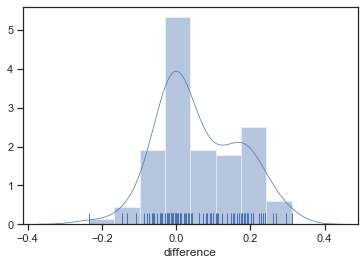

In [26]:
sns.distplot(cluster_counts[cluster_counts.phase=='post']['difference'], rug=True)

In [70]:
def draw_row_chunk(row):
    axs[row.name].axis('off')
    chunk = bc.cropped_chunk_to_string(row.chunk_array)
    drawing.show_chunk([chunk], axs[row.name], target=row.targetName)

In [121]:
cluster_counts

,chunk_array,chunk_height,chunk_id,chunk_str,n_cluster_members,n_with_chunk,phase,proportion_with_chunk,targetName,total_phase_reconstructions,difference,both_zero
0,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",5.0,0.0,0000000000000000000000000000000000000000000000...,16.0,3.0,pre,0.028571,hand_selected_004,105.0,0.038095,False
1,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",5.0,0.0,0000000000000000000000000000000000000000000000...,16.0,7.0,post,0.066667,hand_selected_004,105.0,0.038095,False
2,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",1.0,1.0,0000000000000000000000000000000000000000000000...,48.0,76.0,pre,0.723810,hand_selected_004,105.0,0.038095,False
3,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",1.0,1.0,0000000000000000000000000000000000000000000000...,48.0,80.0,post,0.761905,hand_selected_004,105.0,0.038095,False
4,"[[1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, ...",1.5,2.0,0000000000000000000000000000000000000000000000...,24.0,8.0,pre,0.076190,hand_selected_004,105.0,0.028571,False
...,...,...,...,...,...,...,...,...,...,...,...,...
315,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",6.0,17.0,0000000000000000000000000000000000000000000000...,3.0,19.0,post,0.180952,hand_selected_016,105.0,0.028571,False
316,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",7.0,18.0,0000000000000000000000000000000000000000000000...,1.0,10.0,pre,0.095238,hand_selected_016,105.0,0.076190,False
317,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",7.0,18.0,0000000000000000000000000000000000000000000000...,1.0,18.0,post,0.171429,hand_selected_016,105.0,0.076190,False
318,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",3.0,19.0,0000000000000000000000000000000000000000000000...,1.0,3.0,pre,0.028571,hand_selected_016,105.0,-0.019048,False


In [122]:
cluster_count_diffs = cluster_counts[(cluster_counts.phase=='post')]

In [123]:
cluster_count_diffs[cluster_count_diffs.targetName=='hand_selected_009']

,chunk_array,chunk_height,chunk_id,chunk_str,n_cluster_members,n_with_chunk,phase,proportion_with_chunk,targetName,total_phase_reconstructions,difference,both_zero
161,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",7.000000,0.0,0000000000000000000000000000000000000000000000...,18.0,38.0,post,0.361905,hand_selected_009,105.0,0.238095,False
163,"[[1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, ...",1.000000,1.0,0000000000000000000000000000000000000000000000...,19.0,76.0,post,0.723810,hand_selected_009,105.0,0.114286,False
165,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",6.500000,2.0,0000000000000000000000000000000000000000000000...,29.0,0.0,post,0.000000,hand_selected_009,105.0,0.000000,True
167,"[[0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, ...",3.500000,3.0,0000000000000000000000000000000000000000000000...,3.0,0.0,post,0.000000,hand_selected_009,105.0,0.000000,True
169,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",5.000000,4.0,0000000000000000000000000000000000000000000000...,25.0,78.0,post,0.742857,hand_selected_009,105.0,0.209524,False
171,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",6.000000,5.0,0000000000000000000000000000000000000000000000...,29.0,3.0,post,0.028571,hand_selected_009,105.0,0.009524,False
173,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",5.000000,6.0,0000000000000000000000000000000000000000000000...,15.0,52.0,post,0.495238,hand_selected_009,105.0,0.171429,False
175,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",3.000000,7.0,0000000000000000000000000000000000000000000000...,35.0,69.0,post,0.657143,hand_selected_009,105.0,0.095238,False
177,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...",3.000000,8.0,0000000000000000000000000000000000000000000000...,27.0,75.0,post,0.714286,hand_selected_009,105.0,0.133333,False
179,"[[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, ...",2.000000,9.0,0000000000000000000000000000000000000000000000...,5.0,0.0,post,0.000000,hand_selected_009,105.0,-0.009524,False


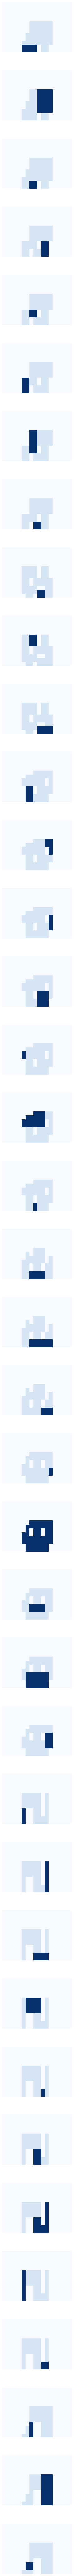

In [71]:
# show chunks built less over time 
df_negative_diffs = cluster_counts[(cluster_counts.phase=='post') & (cluster_counts.difference < 0)].reset_index()
n_chunks = df_negative_diffs.shape[0]
fig, axs = plt.subplots(n_chunks, figsize=(4,n_chunks*4)) 

_ = df_negative_diffs.apply(lambda row: draw_row_chunk(row), axis=1)


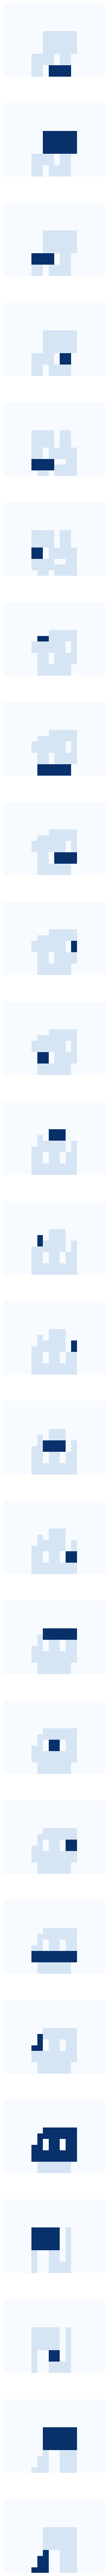

In [72]:
# show chunks built a lot more over time 
df_negative_diffs = cluster_counts[(cluster_counts.phase=='post') & (cluster_counts.difference > 0.15)].reset_index()
n_chunks = df_negative_diffs.shape[0]
fig, axs = plt.subplots(n_chunks, figsize=(4,n_chunks*4)) 

_ = df_negative_diffs.apply(lambda row: draw_row_chunk(row), axis=1)

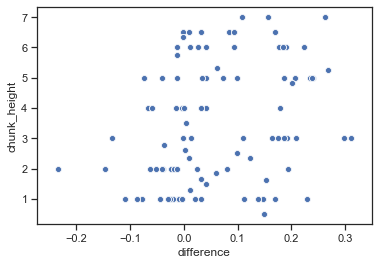

In [73]:
sns.scatterplot(data=cluster_counts, x='difference', y='chunk_height')

In [74]:
up_mean = np.mean(cluster_counts[(cluster_counts.phase=='pre') & (cluster_counts.difference > 0)].chunk_height)
up_std = np.std(cluster_counts[(cluster_counts.phase=='pre') & (cluster_counts.difference > 0)].chunk_height)

In [75]:
down_mean = np.mean(cluster_counts[(cluster_counts.phase=='pre') & (cluster_counts.difference < 0)].chunk_height)
down_std = np.mean(cluster_counts[(cluster_counts.phase=='pre') & (cluster_counts.difference < 0)].chunk_height)

In [76]:
#find out if these means are different
# https://en.wikipedia.org/wiki/Student%27s_t-test
(up_mean - down_mean)/(np.sqrt((up_std**2 + down_std**2)/2)) #not this!

0.4704562987979569

In [ ]:
# inspect one target
target = 'hand_selected_016'

fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid')
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.pointplot(data=cluster_counts[cluster_counts.targetName== target],\
              x='phase', y='proportion_with_chunk', hue='chunk_id')

In [ ]:
# print chunks from 

chunks = df_chunk_clusters[(df_chunk_clusters.targetName == target) & 
                          (df_chunk_clusters.cluster_method=='k-means') & 
                          (df_chunk_clusters.n_cluster==10)].reset_index().chunks[0]

n_chunks = len(chunks)

fig, axs = plt.subplots(n_chunks, figsize=(4,n_chunks*4)) 

target_name = df_proc_chunks.iloc[30]['targetName']

for j, chunk in enumerate(chunks):
    axs[j].axis('off')
    drawing.show_chunk([bc.cropped_chunk_to_string(chunk.reshape((8,8)))], axs[j], target=target)
    axs[j].set_title(str(j))

## Exploration

For each structure I've got a list of all chunks from all decompositions. 
I'm now clustering these to give us something to compare to building procedures (either a median, or exemplar, or set of chunks from that cluster).
As I see it there are two sensible ways of clustering:
1. Use biclustering where k = the mean number of chunks assigned to that structure.
    - this seems intuitive and works fairly well, but in trying to assign every single chunk to a cluster it ends up with some messier clusters. It seems like a bad decision to force obscure chunks into a cluster.
2. Use affinity propagation
    - this seems the better strategy. Here we don't have to prespecify the number of chunks, and we can just throw away any clusters with few members. It also clusters by finding an exemplar, which gives us something simple to work with when comparing with procedures.


#### Cluster using biclustering, where k = mean number of chunks for that structure.
Looks cool, but probably not the best clustering method as it forces every chunk into a cluster. Maybe some chunks are completely different from the others and we'd rather throw them away.

In [ ]:
target = 'hand_selected_012'

# get the mean number of chunks for that structure
meanNChunks = np.round(df_trial.groupby('targetName')['nChunksHighlighted'].mean()).astype(int).to_dict()

# group into n clusters where n is the mean amount of chunks for that structure

clustering = SpectralBiclustering(n_clusters=meanNChunks[target], random_state=0).fit(dmats[target]) # https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html
order = clustering.row_labels_

sorted_rdm = dmats[target][np.argsort(clustering.row_labels_)]
sorted_rdm = sorted_rdm[:, np.argsort(clustering.column_labels_)]

img1 = plt.matshow(dmats[target])
plt.axis('off')
plt.colorbar()
img2 = plt.matshow(sorted_rdm)
plt.axis('off')
img1.set_cmap('hot')
img2.set_cmap('hot')
plt.colorbar()

#### cluster using k-means

In [ ]:
# explore k-means

target = 'hand_selected_012'

feature_mat = np.array(chunks[target])

# get the mean number of chunks for that structure
meanNChunks = np.round(df_trial.groupby('targetName')['nChunksHighlighted'].mean()).astype(int).to_dict()

# group into n clusters where n is the mean amount of chunks for that structure
kmeans = KMeans(n_clusters=meanNChunks[target], random_state=0).fit(feature_mat)
# kmeans = KMeans(n_clusters=19, random_state=0).fit(feature_mat)

order = kmeans.labels_

sorted_chunks = feature_mat[np.argsort(kmeans.labels_),:]

In [ ]:
# kmeans.labels_

# for i in range(sorted_chunks.shape[0]):
#     plt.matshow(np.rot90(np.reshape(sorted_chunks[i,:],(8,8))))
#     plt.axis('off')
#     plt.title(np.sort(kmeans.labels_)[i])

In [ ]:
for prototype in kmeans.cluster_centers_:
    fig = plt.figure(figsize=(1,1))
    img1 = plt.imshow(np.rot90(prototype.reshape((8,8))))
    plt.axis('off')

In [ ]:
# round up to get possible chunks

threshold = 0.4

for prototype in (kmeans.cluster_centers_>=threshold)*1:
    fig = plt.figure(figsize=(1,1))
    img1 = plt.imshow(np.rot90(prototype.reshape((8,8))))
    plt.axis('off')



In [ ]:
# explore parameters of k-means that minimize objective

In [ ]:
# number of clusters

kms = {}

df_kms = pd.DataFrame()

for target in targets:
    
    kms[target] = {}
    
    for n_cluster in range(3,20):
        
        feature_mat = np.array(chunks[target])

        # get the mean number of chunks for that structure
        meanNChunks = np.round(df_trial.groupby('targetName')['nChunksHighlighted'].mean()).astype(int).to_dict()

        # group into n clusters where n is the mean amount of chunks for that structure
        # kmeans = KMeans(n_clusters=meanNChunks[target], random_state=0).fit(feature_mat)
        kms[target][n_cluster] = KMeans(n_clusters=n_cluster, random_state=0).fit(feature_mat)
        
        df_kms = df_kms.append(
            {
                'targetName': target,
                'n_cluster': n_cluster,
                'kmeans': kms[target][n_cluster],
                'inertia': kms[target][n_cluster].inertia_
            },
            ignore_index=True
        )

#     sorted_chunks = feature_mat[np.argsort(kmeans.labels_),:]

In [ ]:
sns.lineplot(x='n_cluster', y='inertia',hue='targetName',data=df_kms)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Visualize clusters

In [ ]:
target = 'hand_selected_006'

In [ ]:
# Explore clustering

clustering = clusters[target]

labels = clustering.labels_

cluster_centers_indices = clustering.cluster_centers_indices_
cluster_centers_ = clustering.cluster_centers_

n_clusters_ = len(cluster_centers_indices)

print(str(n_clusters_) + ' clusters')


In [ ]:
label = 0

for label in np.unique(labels):

    chunk_cluster = featureMats[target][labels==label,:].sum(axis=0).reshape((8,8))
    
    fig = plt.figure(figsize=(1,1))
    img1 = plt.imshow(np.rot90(chunk_cluster))
    plt.title(str(featureMats[target][labels==label,:].shape[0]))
    plt.axis('off')

In [ ]:
for exemplar in cluster_centers_:
    fig = plt.figure(figsize=(1,1))
    img1 = plt.imshow(np.rot90(exemplar.reshape((8,8))))
    plt.axis('off')

Next:

- For each chunk:
    - go through action sequences to see:
        - number of exact matches
        - ratio of contained vs. spanning
        
Somewhere I have a way of searching action sequences by world-diff, which should be the same representation as these perceptual chunks (once they've been aligned in an 18x13 gridworld)

Lots of testing needed at this stage

consider:

- construct dataframe with all world differences.
    - i.e. action 0-1, 0-2, 0-3, 1-2, 1-3, etc.
    - would be large.
    - (gameID, targetName, trialNum, rep, condition, world-diff, action_1, action_2, window)
- see if there's a match, if so +1

In [ ]:
# construct dataframe with all world differences.
# i.e. action 0-1, 0-2, 0-3, 1-2, 1-3, etc.
# (gameID, targetName, trialNum, rep, condition, world-diff, action_1, action_2, window)


#### Example of searching for reconstructions containing perceptual chunk

In [ ]:
n_chunks = len(df_proc_chunks.iloc[30]['all_chunks'])

fig, axs = plt.subplots(n_chunks, figsize=(4,n_chunks*4)) 

target_name = df_proc_chunks.iloc[30]['targetName']

for j, chunk in enumerate(df_proc_chunks.iloc[30]['all_chunks']):
    axs[j].axis('off')
    drawing.show_chunk([chunk], axs[j], target=target_name)
    

In [ ]:
# find the structures with that chunk (assumes chunk in same format, and a given window size)

target = 'hand_selected_012'
# convert perceptual chunks into string
chunk_str = bc.cropped_chunk_to_string(cluster_centers_[0].reshape((8,8)))


subset_with_chunk = df_proc_chunks[(df_proc_chunks.targetName == target) & 
                              (df_proc_chunks['all_chunks'].apply(lambda chunks: chunk_str in chunks))]


In [ ]:
# draw all reconstructions for h

drawing.draw_reconstructions(subset_with_chunk)

#### Find proportion of reconstructions with each chunk

Questions:
- some average of cluster members, or exemplars?
- do I use all clusters, take a pre-specified number, or drop clusters with few members?
    - I'm fairly sure I should drop clusters with few members, but not sure of the exact criteria I should use

In [ ]:
# for each exemplar with more than 3 members, count proportion of reconstructions in pre, and number of reconstructions in post

cluster_counts = pd.DataFrame()

for target in targets:
    
    for cluster_number, exemplar in enumerate(clusters[target].cluster_centers_):
        
        chunk_str = bc.cropped_chunk_to_string(exemplar.reshape((8,8)))
        
        n_cluster_members = sum(clusters[target].labels_ == cluster_number)
        
        if n_cluster_members > 3:
        
            for phase in ['pre','post']:

                subset_for_target = df_proc_chunks[(df_proc_chunks.blockFell == False) &
                                                   (df_proc_chunks.targetName == target) &
                                                   (df_proc_chunks.phase == phase)]

                subset_with_chunk = subset_for_target[(subset_for_target['all_chunks']\
                                                       .apply(lambda chunks: chunk_str in chunks))]

                row = {
                    'targetName': target,
                    'phase': phase,
                    'chunk_str': chunk_str,
                    'n_cluster_members': n_cluster_members,
    #                 'reconstructions_with_chunk': list(subset_with_chunk['discreteWorld']),
                    'total_phase_reconstructions': subset_for_target.shape[0],
                    'n_with_chunk': subset_with_chunk.shape[0],
                    'proportion_with_chunk': subset_with_chunk.shape[0] /subset_for_target.shape[0]

                }

                cluster_counts = cluster_counts.append(row,ignore_index=True)



In [ ]:
cluster_counts

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.pointplot(data=cluster_counts, x='phase', y='proportion_with_chunk', hue='targetName')

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.set_context('poster')
sns.set_style('whitegrid', {'legend':False})
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
g = sns.FacetGrid(data=cluster_counts, col="targetName", hue="chunk_str", col_order=targets)
g.map(sns.pointplot,"phase","proportion_with_chunk", order=['pre','post'])

In [ ]:
cluster_counts[cluster_counts.targetName=='hand_selected_006']

In [ ]:


drawing.show_chunk([chunk], axs[j], target='hand_selected_006')

Facetgrid:
Facet is silhouette
Dot is chunk

difference score

Slope is stat we're interested in

___
Spatial biases:
Chunks near the top more likely to appear more at the end?

Popular chunks:
Can popularity be explained by perceptual biases?
Are more popular chunks ones that appear less at the end?
(are less popular chunks relatively flat pre to post?)

___
Keep returning to: is convergence explained by convergence to perceptual chunks? Or something else- not perceptual chunks?




In [ ]:
# Distribution of differences between pre and post

cluster_counts.groupby('chunk_str')

## TO DO next:

- Try a different clustering method (k-means) in addition to affinity propagation
    - Try a range of k
    - Search parameter space for
    - This will give us something that confirms we have stable cluster

- More thoroughly explore the differences in chunks used between pre and post
    - Distribution of differences (proportion post minus proportion pre)
        - Of chunks that go up- who are they?
        - Of chunks that go down- who are they?

- Try *ratio of contained vs. spanning*, instead of *proportion of chunks that are exact match*

